# **Importing Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graphs and visualizations
import seaborn as sns #graphs and visualizations
import sklearn #ML models
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection


# **Loading Data**
First, let's have a look at the training set.

In [2]:
employee_file_path = ('../input/amazon-employee-access-challenge/train.csv')
train_data = pd.read_csv(employee_file_path)
train_data.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [3]:
train_data.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


Not much information about which parameters to choose can be inferred from the training data at first glance.

# **Data Exploration**
After looking at the training data, it is clear that the "ACTION" column is our target variable. Let's have a deeper look into our data.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


As all the data is already in numerical format and has no missing values, we do not require any complex pre-processing of data. 

In [5]:
train_data.ACTION.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

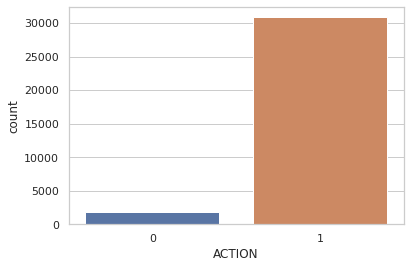

In [6]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='ACTION',data=train_data)
plt.show()

From the above analysis we can see that most requests are approved.

**Request Approved Rate ~ 94%**


**Request  Denied  Rate ~  6%**

In [7]:
train_data['RESOURCE'].value_counts().sort_values(ascending=False)

4675     839
79092    484
75078    409
25993    409
3853     404
        ... 
74051      1
33079      1
98935      1
25227      1
16376      1
Name: RESOURCE, Length: 7518, dtype: int64

Certain Resources are sought to be accessed much more than others.

In [8]:
train_data.nunique() #checking number of unique values for each feature

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

The columns **'RESOURCE' , 'MGR_ID' , 'ROLE_FAMILY_DESC'** have a lot of unique values. But more interstingly, the columns **'ROLE_TITLE' and 'ROLE_CODE'** have the same number of unique values!

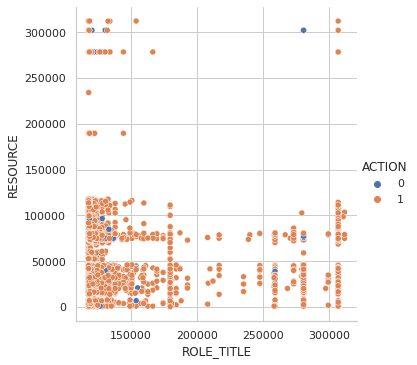

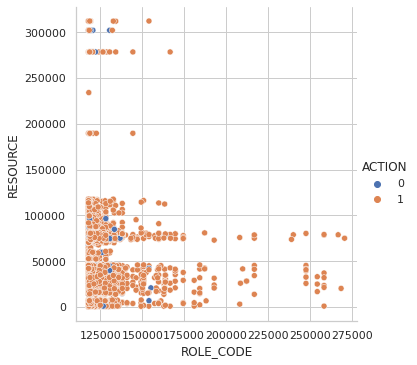

In [9]:
sns.relplot(x='ROLE_TITLE',y='RESOURCE',hue='ACTION',data=train_data)
sns.relplot(x='ROLE_CODE',y='RESOURCE',hue='ACTION',data=train_data)

If we plot these two features against 'RESOURCE', we get strikingly similar plots. Let's analyze further to see if these features have a 1:1 relationship.

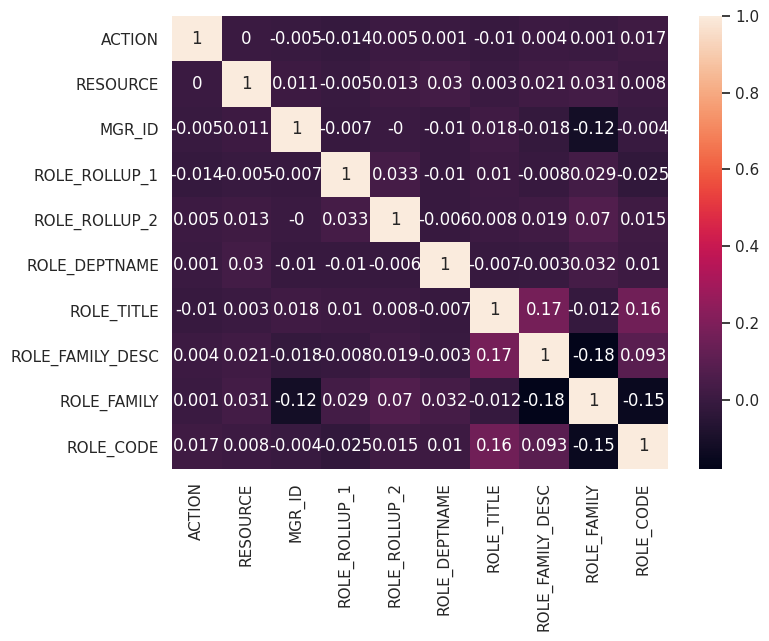

In [10]:
#We will use a correlation matrix
from matplotlib.pyplot import figure  #to increase the size of the plot
figure(figsize=(8, 6), dpi=100)
corr_matrix=round(train_data.corr(),3) #correlation matrix rounded off to 3 decimals
sns.heatmap(corr_matrix,annot=True)
plt.show()

As we can see that 'ROLE_CODE' and 'ROLE_TITLE' have a marginal correlation but significant when compared to rest of the columns.But still, it is not enough to drop one of them as features.

In [11]:
#sns.pairplot(data=train_data,hue='ACTION', kind='scatter')

# **Setting up the input features and target variable**

In [12]:
y = train_data.ACTION  #setting the target variable
X = train_data.drop('ACTION',axis=1) #setting rest of the columns as input features

# **Trying a Logistic Regression Model**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LR_model = LogisticRegression(random_state=0)
#splitting data into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)

In [14]:
from sklearn import metrics 
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
ans = ('Accuracy of the model is approximately %0.2f%%')
print(ans%(accuracy_percentage))

Accuracy of the model is approximately 94.41%


It is quite suspicious that the approval rate is 94% and the model accuracy is close to 94%. Let us further analyze the data to see if something is fishy.

Text(30.5, 0.5, 'Actual')

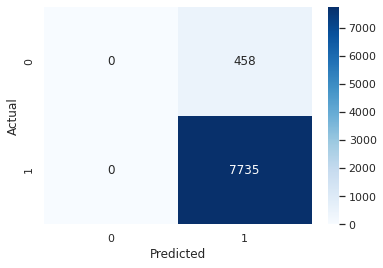

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
LR_conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(LR_conf_matrix,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [16]:
print('True Positives =',LR_conf_matrix[1,1])
print('False Positives =',LR_conf_matrix[0,1])
print('False Negatives =',LR_conf_matrix[1,0])
print('True Negatives =',LR_conf_matrix[0,0])

True Positives = 7735
False Positives = 458
False Negatives = 0
True Negatives = 0


Text(0.5, 1.0, 'ROC curve for Logitstic Regression AUC: 0.50)')

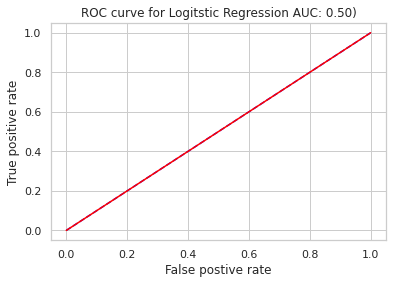

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr1,tpr1,threshold1 = roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.plot(fpr1,tpr1,color='red')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
auc_score1=roc_auc_score(y_test,y_pred)
plt.title('ROC curve for Logitstic Regression AUC: {0:.2f})'.format(auc_score1))

Here we can cleary see that the Logistic Regression model is very good at predicting approved requests ('1') but fails to predict any denied request ('0') .

Also, it has a very poor AUC score of 0.50!

Therefore, its accuracy of almost 94% is misleading as we suspected. 

Let us try a different model that might work better.

# **Trying A Decision Tree Classifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=0)
dtc_model.fit(X_train,y_train)
y_dtc_pred = dtc_model.predict(X_test)

In [19]:
ans1 = ('Accuracy of the model is approximately %0.2f%%')
print(ans1%(100*(metrics.accuracy_score(y_test, y_dtc_pred))))

Accuracy of the model is approximately 92.41%


Well, the accuracy is slightly lower than the Logistic Regression Model, but let's dig a little deeper.

Text(0.5, 12.5, 'Predicted')

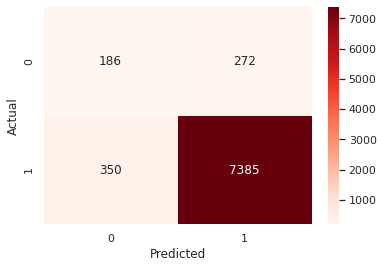

In [20]:
dtc_conf_matrix = confusion_matrix(y_test,y_dtc_pred)
sns.heatmap(dtc_conf_matrix,annot=True,fmt='g',cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [21]:
print('True Positives =',dtc_conf_matrix[1,1])
print('False Positives =',dtc_conf_matrix[0,1])
print('False Negatives =',dtc_conf_matrix[1,0])
print('True Negatives =',dtc_conf_matrix[0,0])

True Positives = 7385
False Positives = 272
False Negatives = 350
True Negatives = 186


In [22]:
dtc_classification_report = classification_report(y_test,y_dtc_pred)
print(dtc_classification_report)

              precision    recall  f1-score   support

           0       0.35      0.41      0.37       458
           1       0.96      0.95      0.96      7735

    accuracy                           0.92      8193
   macro avg       0.66      0.68      0.67      8193
weighted avg       0.93      0.92      0.93      8193



So we can see that the Decision Tree Classifier clearly works much better than the Logistic Regression Model. Therefore, we can say that accuracy is not a good measure of the efficiency of the models in this case.

The DTC model has a **very high precision (~ 96%)** in predicting approved requests ('1') and we are able to predict most approved requests correctly **(Recall ~ 95%)**.

It still has **average precision in predicting denied requests (~35%)**, but still a major improvement over the Logistic Regression Model.

Text(0.5, 1.0, 'ROC curve for Decision Tree Classifer AUC: 0.68)')

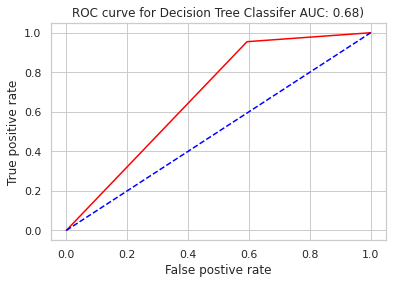

In [23]:
fpr2,tpr2,threshold2 = roc_curve(y_test,y_dtc_pred)
plt.plot(fpr2,tpr2,color='red')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
auc_score2=roc_auc_score(y_test,y_dtc_pred)
plt.title('ROC curve for Decision Tree Classifer AUC: {0:.2f})'.format(auc_score2))

Clearly, this model has a much better AUC score of 0.68

# **Tuning the Hyperparameters**
Let's try to tune our Hyperparameters a bit to see if we can improve our results.

As we have seen that accuracy is not a good measure of a model's effiency for this problem. So we will try to optimize node depth of the model so as to maximize the AUC score.

In [24]:
def best_auc(node_depth,X_train,y_train,X_test,y_test):
    model = DecisionTreeClassifier(max_depth=node_depth,random_state=0)
    model.fit(X_train,y_train)
    preds_val=model.predict(X_test)
    auc = roc_auc_score(y_test,preds_val)
    return auc

In [25]:
candidate_depths = [5,10,15,20,25,26,27,28,29,30]
auc_chosen = best_auc(2,X_train,y_train,X_test,y_test)
depth = 5
for node_depth in candidate_depths:
    temp_auc = best_auc(node_depth,X_train,y_train,X_test,y_test)
    if(temp_auc>auc_chosen):
        auc_chosen = temp_auc
        depth = node_depth
        
best_depth_size = depth
print(best_depth_size)

26


So now that we have tuned our hyperparameters, we plug this value in our DTC model.

In [26]:
dtc_model2 = DecisionTreeClassifier(max_depth=best_depth_size,random_state=0)
dtc_model2.fit(X_train,y_train)
y_dtc_pred2 = dtc_model2.predict(X_test)

In [27]:
ans2 = ('Accuracy of the model is approximately %0.2f%%')
print(ans2%(100*(metrics.accuracy_score(y_test, y_dtc_pred2))))

Accuracy of the model is approximately 92.63%


Text(0.5, 12.5, 'Predicted')

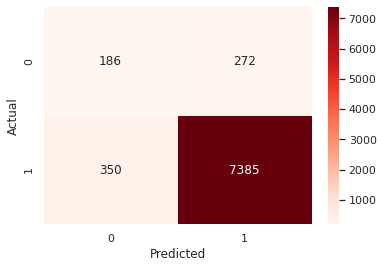

In [28]:
dtc_conf_matrix_new = confusion_matrix(y_test,y_dtc_pred2)
sns.heatmap(dtc_conf_matrix,annot=True,fmt='g',cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [29]:
dtc_classification_report = classification_report(y_test,y_dtc_pred2)
print(dtc_classification_report)

              precision    recall  f1-score   support

           0       0.36      0.43      0.39       458
           1       0.97      0.96      0.96      7735

    accuracy                           0.93      8193
   macro avg       0.66      0.69      0.68      8193
weighted avg       0.93      0.93      0.93      8193



Text(0.5, 1.0, 'ROC curve for Decision Tree Classifer AUC: 0.69)')

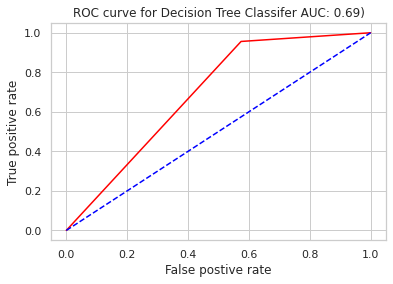

In [30]:
fpr3,tpr3,threshold3 = roc_curve(y_test,y_dtc_pred2)
plt.plot(fpr3,tpr3,color='red')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False postive rate')
plt.ylabel('True positive rate')
auc_score3=roc_auc_score(y_test,y_dtc_pred2)
plt.title('ROC curve for Decision Tree Classifer AUC: {0:.2f})'.format(auc_score3))

From above data, we can see that there was a slight increase in accuracy of the model (~0.22%) but there is negligible increase in AUC score and other parameters like Precision and Recall.

# **Predictions**

In [31]:
#First, let's load the test data
test_data = pd.read_csv('../input/amazon-employee-access-challenge/test.csv')
test_data.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [32]:
test_id = test_data.id
test_data.drop('id',axis=1,inplace=True)
test_data.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [33]:
y_final = dtc_model.predict(test_data)
model_predictions = pd.DataFrame(columns=['Id','Action'])
model_predictions['Id']=test_id
model_predictions['Action']=y_final
model_predictions.head()

,Id,Action
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [34]:
model_predictions.to_csv('My Submission of AEA Challenge.csv',index='False')